## Data Processing

In [49]:
!pip install imblearn
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter

In [50]:
#reads in the df and removes the rows that do not have a good/bad classification
df = pd.read_csv(r"C:\Users\karsa\My Drive\Extracurriculars\Research\Audax Labs\compiled.csv", low_memory=False)
df = df[(df["Good/Bad"] == -1) | (df["Good/Bad"] == 1)]
df.shape

(1537, 629)

In [51]:
df = df.dropna(axis=1, thresh=1500);
df.shape

(1537, 532)

In [52]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols[:-1].tolist()

In [53]:
#imputes the missing values
imp = SimpleImputer(strategy='mean')
df[numeric_cols] = imp.fit_transform(df[numeric_cols])

In [54]:
#remove all columns which only have zeros
cols = []
for col in df.columns:
    if (df[col] == 0).all():
        cols.append(col)

if cols:
    df.drop(columns=cols, inplace=True)
    print(len(cols))

112


In [55]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
       'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10',
       ...
       'Sensor-577', 'Sensor-578', 'Sensor-583', 'Sensor-584', 'Sensor-585',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=416)
Categorical Columns: Index(['Unnamed: 0', 'Sensor-332', 'Sensor-576', 'Sensor-586'], dtype='object')


In [56]:
df[categorical_columns].describe()

,Unnamed: 0,Sensor-332,Sensor-576,Sensor-586
count,1537,1533,1537,1536
unique,1537,309,584,1473
top,Wafer-501,0.1017,0.0862,2.7619
freq,1,26,18,3


In [57]:
df.iloc[:, -1:].value_counts()
#df = df.dropna(subset=[df.columns[-1]])
#df.shape

Good/Bad
-1.0        1448
 1.0          89
dtype: int64

In [64]:
df = df[numerical_columns]

In [67]:
#sets the X and Y
X = df[numerical_columns].iloc[:, :-1]
#X = df.iloc[:, :-1]
Y = df.iloc[:, -1:]
X.shape

(1537, 415)

In [68]:
y = Y.to_numpy().flatten()

In [69]:
#train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [70]:
#SMOTE Balancing
counter = Counter(y_train)
print('Before', counter)
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('After', counter)

Before Counter({-1.0: 866, 1.0: 56})
After Counter({-1.0: 866, 1.0: 866})


In [71]:
#running Naive Baiyes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

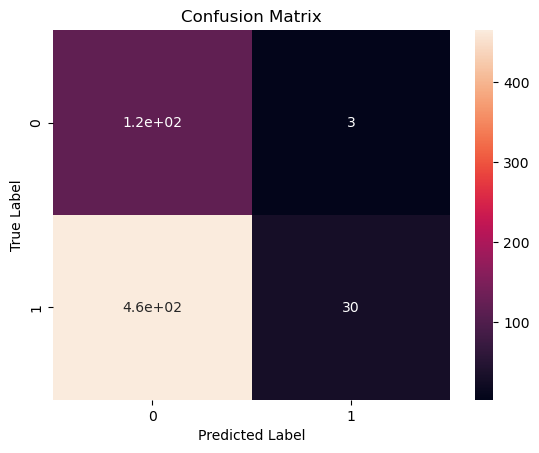

In [72]:
#confusion matrix
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
def get_unique_numbers(numbers):

    list_of_unique_numbers = []

    unique_numbers = set(numbers)

    for number in unique_numbers:
        list_of_unique_numbers.append(number)

    return list_of_unique_numbers

In [74]:
#getting the top 90* columns based on correlation
f_values, p_values = f_classif(X, y)

feature_names = X.columns
feature_f_values = dict(zip(feature_names, f_values))
feature_f_values = {key: value for key, value in feature_f_values.items() if value == value}
sorted_features = sorted(feature_f_values.items(), key=lambda x: x[1], reverse=True)

sorted_features = get_unique_numbers(sorted_features)

sorted_features = sorted_features[:90]
high_corr_columns = [element[0] for element in sorted_features]
high_corr_columns[:5]

C:\Users\karsa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 5 41 48 67] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\karsa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['Sensor-296', 'Sensor-318', 'Sensor-292', 'Sensor-240', 'Sensor-308']

In [75]:
#creating the new df
df = df[high_corr_columns]
df["Good/Bad"] = Y 
df.shape

(1537, 91)

In [77]:
df

,Sensor-296,Sensor-318,Sensor-292,Sensor-240,Sensor-308,Sensor-27,Sensor-460,Sensor-305,Sensor-155,Sensor-177,...,Sensor-126,Sensor-282,Sensor-479,Sensor-8,Sensor-5,Sensor-68,Sensor-338,Sensor-22,Sensor-166,Good/Bad
0,219.7309,0.1781,0.0122,0.0042,0.1628,1.8963,2.7826,0.0997,7.6305,0.3676,...,1.314,0.0154,0.0,0.1247,1.0980,0.8641,1.2731,-6273.75,0.146,-1.0
1,273.4683,0.0919,0.0476,0.0066,0.1220,1.8872,3.1764,0.0313,7.3440,0.2439,...,1.163,0.0160,0.0,0.1210,0.9660,0.9892,1.1525,-6368.50,0.159,-1.0
2,237.0724,0.1377,0.0273,0.0050,0.1379,1.9968,3.3534,0.1726,6.8631,0.2040,...,1.163,0.0138,0.0,0.1230,1.6347,0.8983,1.6024,-5319.25,0.124,-1.0
3,241.3994,0.1320,0.0156,0.0027,0.1636,1.8988,3.5780,0.0530,10.6513,0.2246,...,1.239,0.0513,0.0,0.1238,0.9698,1.1275,1.9749,-6366.00,0.130,-1.0
4,298.9006,0.2205,0.0077,0.0044,0.1530,2.0150,3.2112,0.1302,6.6689,0.2679,...,1.541,0.0115,0.0,0.1230,1.6347,0.8697,1.6186,-5651.25,0.117,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,290.6424,0.1720,0.0198,0.0040,0.1995,2.0313,4.0458,0.1410,5.7757,0.3251,...,1.343,0.0177,0.0,0.1200,1.7585,1.1383,1.7799,-6047.00,0.167,-1.0
1533,323.1455,0.1437,0.0318,0.0051,0.1532,1.8920,3.5083,0.0480,5.9640,0.3417,...,1.343,0.0283,0.0,0.1212,1.6219,1.2731,1.7026,-6336.00,0.140,-1.0
1534,240.5196,0.2982,0.0307,0.0065,0.1415,2.0377,3.9915,0.1292,5.9402,0.2588,...,1.343,0.0145,0.0,0.1229,1.6603,0.9976,2.1294,-5932.00,0.421,-1.0
1535,271.2973,0.2094,0.0288,0.0068,0.1415,1.9860,3.7821,0.0908,5.9404,0.2588,...,1.343,0.0218,0.0,0.1243,1.6377,1.0652,1.8920,-5427.75,0.144,-1.0


In [78]:
df.to_csv(r"C:\Users\karsa\Downloads\audax labs files\Training_Batch_Files\preprocessed.csv", encoding='utf-8', index=False)